# An Introduction to Python for Mathematics

## a crash course

*Simon Shaw*

- <https://www.brunel.ac.uk/people/simon-shaw>
- <https://github.com/variationalform>

Version 1

<table>
<tr>
<td>
<img src="https://www.gnu.org/graphics/heckert_gnu.transp.small.png" style="height:18px"/>
<img src="https://www.gnu.org/graphics/heckert_gnu.transp.small.png" style="height:18px"/>
<img src="https://www.gnu.org/graphics/heckert_gnu.transp.small.png" style="height:18px"/>
</td>
<td>

<p>
This work is available under GPL 3

<p>
Visit <a href="https://www.gnu.org/licenses/gpl-3.0.en.html">https://www.gnu.org/licenses/gpl-3.0.en.html</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## Contents

This is a very quick run through of how to use some basic features of python in a Jupyter
notebook. We'll cover:

1. markdown
1. linear algebra
1. plotting
1. prob/stat simulations
1. some other stuff... if time...

There is a lot we don't touch...

There is a beamer/PDF slide show with some background to the code below.

This material is on git at: <https://github.com/variationalform/PythonMathsPrimer>

you can run the notebook on binder using this:

<https://mybinder.org/v2/gh/variationalform/PythonMathsPrimer/HEAD>

This code creates a button - but it breaks LaTeX output

```
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/variationalform/PythonMathsPrimer/HEAD)
``` 


## Markdown

First note this cell - it is a **markdown** cell, not a 'code' cell. This allows for
*literate programming*: we can explain our algorithm with bullets, 

- step 1
- step 2
  - substep 2.1
- step 3

or with enumeration,

1. step 1
1. step 2
  1. substep 2.1
1. step 3

We can type maths in LaTeX, like this: find $\boldsymbol{u}\in V$ such that

$$
a(\boldsymbol{u},\boldsymbol{v}) = \langle \daleth, \boldsymbol{v}\rangle
\qquad\forall \boldsymbol{v} \in V.
$$

There is no equation numbering, BiBTeX, graphics etc. AFAIK though... 
perhaps see **bookdown**. HTML is allowed.

## Leontief Input-Output Models

This *input-output* problem has been set up in the accompanying slide show.

We have 
$\boldsymbol{x} = \boldsymbol{A}\boldsymbol{x}+\boldsymbol{d}$ or, alternatively, 
$(\boldsymbol{I} - \boldsymbol{A})\boldsymbol{x} = \boldsymbol{d}$

First some simple arithmetic as a warm up... And an introduction to `numpy`

In [1]:
0.9*50000 - 0.5*40000

25000.0

In [2]:
-0.3*50000 + 0.8*40000

17000.0

In [3]:
print(0.9*50000 - 0.5*40000, -0.3*50000 + 0.8*40000)

25000.0 17000.0


Note that
$$
\boldsymbol{A} = {0.1\ 0.5\choose 0.3\ 0.2}
\Longrightarrow
\boldsymbol{I}-\boldsymbol{A}
= {1\ 0\choose 0\ 1}-{0.1\ 0.5\choose 0.3\ 0.2} = {\phantom{-}0.9\ \ -0.5\choose -0.3\ \ \phantom{-}0.8}
$$
and therefore
$$
(\boldsymbol{I}-\boldsymbol{A})^{-1} = \frac{1}{(0.9)(0.8) - (0.5)(0.3)}
{0.8\ \ 0.5\choose 0.3\ \ 0.9}
=\frac{10}{57}{8\ \ 5 \choose 3\ \ 9}
$$
What are these?
$$
\frac{10}{57}{8\ \ 5 \choose 3\ \ 9}{35000\choose 29000}
\qquad\text{ and }\qquad
\frac{10}{57}{8\ \ 5 \choose 3\ \ 9}{2500\choose 1900}
$$

In [4]:
d1=35000; d2=29000; print(10/57*(8*d1 + 5*d2), 10/57*(3*d1 + 9*d2))

74561.40350877192 64210.52631578947


In [5]:
d1=2500; d2=1900; print(10/57*(8*d1 + 5*d2), 10/57*(3*d1 + 9*d2))

5175.438596491228 4315.78947368421


Let's introduce `numpy` - for arrays, and hence linear algebra.
We'll duplicate the calculation above...

In [6]:
import numpy as np
A = np.array([[0.1, 0.5],[0.3, 0.2]]) # use tab completion on 'np.a'
Id = np.eye(2)
print(Id-A)
print(5.7*np.linalg.inv(Id-A))   # using inverse matrices is usually bad! 
d = np.array([[35000],[29000]])
print(np.linalg.solve(Id-A, d))
Dd = np.array([[2500],[1900]])
print(np.linalg.solve(Id-A, Dd))

[[ 0.9 -0.5]
 [-0.3  0.8]]
[[8. 5.]
 [3. 9.]]
[[74561.40350877]
 [64210.52631579]]
[[5175.43859649]
 [4315.78947368]]


Back to the Leontief IO problem...

In [7]:
print('This is the technical matrix: A = ')
A = np.array([[0.15, 0.12, 0.05, 0.03],
              [0.17, 0.16, 0.04, 0.04],
              [0.03, 0.08, 0.18, 0.22],
              [0.07, 0.18, 0.03, 0.19]])
print(A)
print('Here are the total output levels: x = ')
x = np.array([[89000], [55000], [47000], [76000]])
print(x.T)
print('Note the transpose - a tidier output...')

This is the technical matrix: A = 
[[0.15 0.12 0.05 0.03]
 [0.17 0.16 0.04 0.04]
 [0.03 0.08 0.18 0.22]
 [0.07 0.18 0.03 0.19]]
Here are the total output levels: x = 
[[89000 55000 47000 76000]]
Note the transpose - a tidier output...


In [8]:
print('This is the Leontiev matrix: I-A = ')
Id = np.eye(4)
print(Id-A)
print('The amounts available for external demand are: d = ')
print((Id-A).dot(x).T)

This is the Leontiev matrix: I-A = 
[[ 0.85 -0.12 -0.05 -0.03]
 [-0.17  0.84 -0.04 -0.04]
 [-0.03 -0.08  0.82 -0.22]
 [-0.07 -0.18 -0.03  0.81]]
The amounts available for external demand are: d = 
[[64420. 26150. 14750. 44020.]]


In [9]:
print('The required total output is: x = ')
d = np.array([[55000],[24000],[18000],[40000]])
print(np.linalg.solve(Id-A, d).T)
print('The change in external demand: Dd = ')
Dd = np.array([[-5000], [350], [2300],[-500]])
print(Dd.T)
print(np.linalg.solve(Id-A, Dd).T)

The required total output is: x = 
[[76985.04648009 49721.31303541 48094.90788649 68866.21831676]]
The change in external demand: Dd = 
[[-5000   350  2300  -500]]
[[-5899.0465539   -730.25568572  2193.68789267 -1208.10943879]]


## Eigensystems and SVD

While we are looking at linear algebra it's useful to look at
eigenvalue problems and the related SVD. We'll stay with the
technical matrix $\boldsymbol{A}$ as defined above...

In [10]:
w, V = np.linalg.eig(A)
print('The eigenvalues are ', w) # the eigenvalues
print(f'the shape of the eigenvector matrix V is {V.shape}')
print('and the first two eigenvectors are')
print(V[:,:2])

The eigenvalues are  [0.42116703+0.j         0.00461882+0.j         0.12710707+0.07455003j
 0.12710707-0.07455003j]
the shape of the eigenvector matrix V is (4, 4)
and the first two eigenvectors are
[[-0.36169836+0.j -0.53830234+0.j]
 [-0.41503348+0.j  0.60726175+0.j]
 [-0.65491995+0.j  0.37609264+0.j]
 [-0.51768849+0.j -0.44723381+0.j]]


We can check that $\boldsymbol{A}\boldsymbol{V} = \boldsymbol{V}\boldsymbol{D}$...

See e.g. <https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html>

In [11]:
D=np.diag(w)
print('D = \n', D)
# print(A@V - V@D)  # uncomment it if you like, but this is better...
print(f"Frobenius norm, ||AV-VD||F = {np.linalg.norm(A@V - V@D, ord='fro')}")

D = 
 [[0.42116703+0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.00461882+0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.12710707+0.07455003j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.12710707-0.07455003j]]
Frobenius norm, ||AV-VD||F = 4.548644071527765e-16


#### The SVD ...

There are a couple of *gotchas* for the SVD, it works like this...

In [12]:
K = np.array([[1,2,5],[5,-6,1]])   
U, S, VT = np.linalg.svd(K)
print('U is what we expect', U)
print('But S is not!', S)
print('V-transpose gets returned, not V', VT)

U is what we expect [[-0.06213744  0.9980676 ]
 [ 0.9980676   0.06213744]]
But S is not! [7.88191065 5.4658471 ]
V-transpose gets returned, not V [[ 0.62525456 -0.77553283  0.08720987]
 [ 0.23944227  0.29699158  0.9243719 ]
 [-0.74278135 -0.55708601  0.37139068]]


We can stack `S` to get what we expect ...

In [13]:
S = np.hstack(( np.diag(S), np.zeros((2,1)) ))
print('S is now the correct shape\n', S)

# print(K - U @ S @ VT) # again, uncomment if you like but this is better
print(f"The inf-norm ||K - U S V^T||inf = {np.linalg.norm(K - U @ S @ VT, np.inf)}")

S is now the correct shape
 [[7.88191065 0.         0.        ]
 [0.         5.4658471  0.        ]]
The inf-norm ||K - U S V^T||inf = 2.7755575615628914e-15


### Exercises 1

Open a new cell under this and attempt these...

1. Find the required total output for
$\boldsymbol{d} = (51k, 26k, 15k, 48k)^T$.

2. Find (and verify) the eigensystem for the $N\times N$ tridiagonal Laplacian matrix

$$
\boldsymbol{A} = \frac{1}{h^2}\left(\begin{array}{rrrrrrrrr}
         2 & -1 &  0 & \cdots          \\
        -1 &  2 & -1 & 0 & \cdots      \\
         0 & -1 &  2 & -1 & 0 & \cdots      \\
    \cdots &  0 & -1 &  2 & -1 & 0 & \cdots      \\
           &    &  &\ddots  &\ddots  &\ddots &  \\
&& \cdots  & 0 & -1 &  2 & -1 & 0      \\
&&& \cdots         &  0 & -1 &  2 & -1      \\
&&&& \cdots & 0 & -1 &  2 \\
\end{array}\right)
$$
where $h = (N+1)^{-2}$. Hint:
```
diag = np.ones(4)
print(2*np.diag(diag)-np.diag(diag[1:],-1)-np.diag(diag[1:],1))
```

## Plotting in 2D

We introduce `matplotlib`. There are others but this seems to be the most common.

Here is a simple example

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


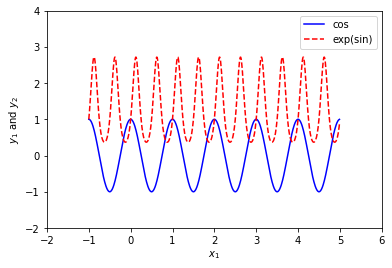

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1,5,0.01)
y1, y2 = np.cos(2*np.pi*x), np.exp(np.sin(4*np.pi*x))
plt.plot(x,y1, 'b-')
plt.plot(x,y2, 'r--')
plt.axis([-2, 6, -2, 4])
plt.legend(['cos', 'exp(sin)'])
plt.xlabel(r'$x_1$'); plt.ylabel('$y_1$ and $y_2$') 
plt.savefig('./gfx/my2Dplot.png', dpi=600)
plt.savefig('./gfx/my2Dplot.eps', dpi=600)



Note that once we have imported we don't have to do it again.

However - make sure you execute the notebook from the top down!

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


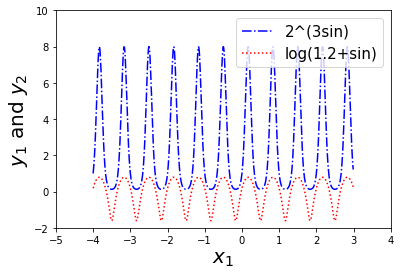

In [15]:
x = np.arange(-4,3,0.01)
y1, y2 = 2**(3*np.sin(3*np.pi*x)), np.log(1.2+np.sin(3*np.pi*x))
plt.plot(x,y1, 'b-.')
plt.plot(x,y2, 'r:')
plt.axis([-5, 4, -2, 10])
plt.legend(['2^(3sin)', 'log(1.2+sin)'], fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20); plt.ylabel('$y_1$ and $y_2$', fontsize=20) 
plt.savefig('./gfx/my2Dplot2.png', dpi=600)
plt.savefig('./gfx/my2Dplot2.eps', dpi=600)

### Exercises 2

1. Find (and verify) the SVD of 
$$
\boldsymbol{K} = \left(\begin{array}{rrrr}
 2 & -5 &  7 & -9 \\
-1 &  2 & -1 &  0 \\
\end{array}\right)
$$
Find a rank one approximation to $\boldsymbol{K}$ and determine the error
in the Frobenius norm (Hint: look up `np.linalg.norm()`).

2. Consider `y = np.heaviside(np.sin(2*np.pi*x),0)` and plot a 
square waves with periods $\pi$ and $\pi^2$ and amplitudes $2$ and $5$.
(Hint: use `np.pi**2`)

## Anonymity

Based on 

 - https://www.johndcook.com/blog/2018/12/07/simulating-zipcode-sex-birthdate/
 - https://techscience.org/a/2015092903/
 

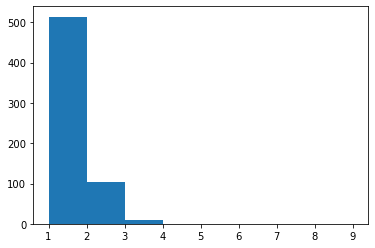

In [16]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

d = 365*3*2
N = 750
buckets = np.zeros(d)

for _ in range(N):
    z = randrange(d)
    buckets[z] += 1

plt.hist(buckets, range(1,10)); # note the semi-colon (try without)

In [17]:
loners = len(buckets[buckets==1])
print('Probability that anonymous data occurs only once: ', loners/N)
print('Nearly exact probability that anonymous data occurs only once: ',
       np.exp(-N/d))
loners2 = len(buckets[buckets==2])
print('Probability that anonymous data occurs at most twice: ',
      (loners+2*loners2)/N)
loners3 = len(buckets[buckets==3])
print('Probability that anonymous data occurs at most three times: ',
      (loners+2*loners2+3*loners3)/N)
loners4 = len(buckets[buckets==4])
print('Probability that anonymous data occurs at most four times: ',
      (loners+2*loners2+3*loners3+4*loners4)/N)

Probability that anonymous data occurs only once:  0.6853333333333333
Nearly exact probability that anonymous data occurs only once:  0.7100174346347615
Probability that anonymous data occurs at most twice:  0.96
Probability that anonymous data occurs at most three times:  1.0
Probability that anonymous data occurs at most four times:  1.0


In [18]:
print( sum(buckets) )
print( len(buckets[buckets!=0]), end = ', ')
print( len(buckets[buckets==1]), end = ', ' )
print( len(buckets[buckets==2]), end = ', ' )
print( len(buckets[buckets==3]), end = ', ' )
print( len(buckets[buckets==4]), end = ', ' )
print( len(buckets[buckets>4]), end = ', ' )

# a check
print( len(buckets[buckets==1])+2*len(buckets[buckets==2])
       +3*len(buckets[buckets==3])+4*len(buckets[buckets==4]) )

750.0
627, 514, 103, 10, 0, 0, 750


## Discrete Fourier Transform

Here's an example from the docs: 
- <https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft>
- <https://docs.scipy.org/doc/scipy-1.5.2/reference/tutorial/fft.html>


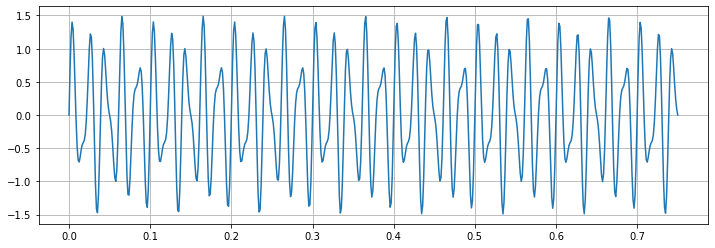

In [19]:
from scipy.fft import fft, fftfreq, ifft
N = 600; dt = 1.0 / 800.0   # number of sample points and sample spacing
t = np.linspace(0.0, N*dt, N)
y = np.sin(50.0 * 2.0*np.pi*t) + 0.5*np.sin(80.0 * 2.0*np.pi*t)
plt.figure(figsize=(12, 4)); plt.plot(t, y);  plt.grid(); plt.show()

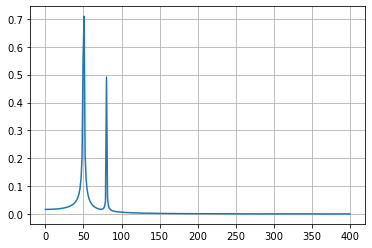

In [20]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2) # or xf = fftfreq(N,T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])); plt.grid(); plt.show()

Let's noise it up a bit...

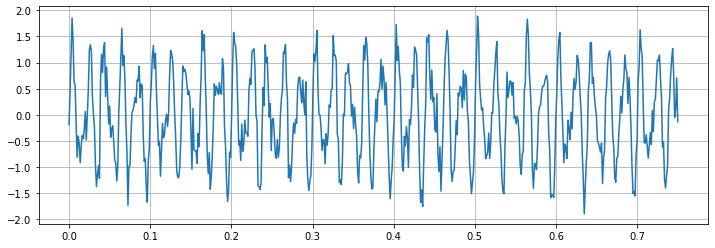

In [21]:
#import numpy.random.normal
yn  = np.sin(50.0 * 2.0*np.pi*t) + 0.5*np.sin(80.0 * 2.0*np.pi*t)
yn += np.random.normal(0,200*dt,yn.shape)
plt.figure(figsize=(12, 4)); plt.plot(t, yn);  plt.grid(); plt.show()

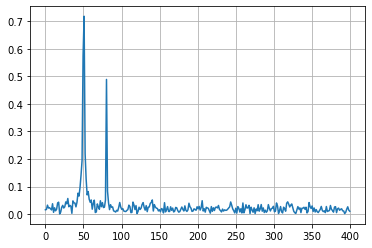

In [22]:
ynf = fft(yn)
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2) # or xf = fftfreq(N,T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(ynf[0:N//2])); plt.grid(); plt.show()

## ODE Solver - Huen's method

Given $\dot{\boldsymbol{z}} = \boldsymbol{f}(t,\boldsymbol{z(t)})$ Heun's method, with 
$\boldsymbol{z}(0)=\boldsymbol{z}_0$ is,

\begin{align*}
\boldsymbol{y}_{n+1}
& = \boldsymbol{z}_n + k \boldsymbol{f}(t_n,\boldsymbol{z}_n),
\\
\boldsymbol{z}_{n+1}
& =
\boldsymbol{z}_n + \frac{k}{2}\Big(
\boldsymbol{f}(t_n,\boldsymbol{z}_n)
+
\boldsymbol{f}(t_{n+1},\boldsymbol{y}_{n+1})
\Big),
\end{align*}

for $n=0,1,2,3,..., N-1$ and where $k=T/N$ for the final time $T$.

Example (from Example 8.4B in Numerical Analysis, a practical approach, MJ Maron and RJ Lopez,
Wordsworth Publishing Company, 1991):

$$
\dot{\boldsymbol{z}}
= \left(\begin{array}{r} \dot{x} \\ \dot{y} \end{array}\right)
= 
\left(\begin{array}{r} 0 \\ t \end{array}\right)
+
\left(\begin{array}{rr} 0 & 1 \\ 1 & 0 \end{array}\right)
\left(\begin{array}{r} x \\ y \end{array}\right)
= 
\left(\begin{array}{r} 0 \\ t \end{array}\right)
+
\boldsymbol{B}\boldsymbol{z}
= 
\boldsymbol{f}(t,\boldsymbol{z})
$$

with $\boldsymbol{z}(0) = (1,-1)^T$ has solution

$$
\boldsymbol{z}
= \frac{1}{2}\left(\begin{array}{r} 
\exp(t)+\exp(-t)-2t
\\
\exp(t)-\exp(-t)-2
\end{array}\right).
$$

Here is the code... With an example definition of a function...

In [23]:
# NOTE the use of [:,[n]] rather that [:,n] - a slice gives a column...
def Huen(N,k,B):
  # allocate solution vector and set up initial condition
  z = np.zeros((2,N+1)); z[0,0] = 1; z[1,0] = -1
  for n in range(N):
    tn = n*k
    f = np.array([[0],[tn]]) + B @ z[:,[n]]
    z[:,[n+1]] = z[:,[n]] + k*f
    f = f + np.array([[0],[tn+k]]) + B @ z[:,[n+1]]
    z[:,[n+1]] = z[:,[n]] + 0.5*k*f
  return z[:,[N]]

T = 10; N1 = 64; B = np.array([[0,1],[1,0]])
zexact  = 0.5*np.array([[np.exp(T)+np.exp(-T)-2*T],[np.exp(T)-np.exp(-T)-2]])
maxit = 8; Nvals = np.zeros(maxit); errors = np.zeros(maxit)
for i in range(maxit):
    N = N1*2**i; k = T/N; Nvals[i] = N;
    zapprox = Huen(N,k,B)
    errors[i] = np.linalg.norm(zexact - zapprox)
    print(errors[i])

553.9969262552904
148.72911957118532
38.41966013228909
9.755381185582275
2.4573348385089204
0.6166231615350984
0.1544405550689361
0.03864564398922986


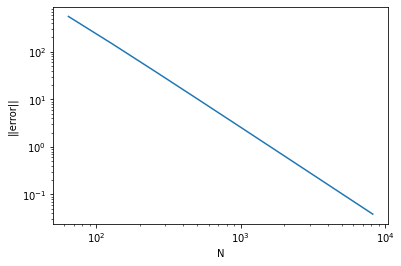

In [24]:
plt.loglog(Nvals,errors); plt.xlabel('N'); plt.ylabel('||error||');

## Going Further

if you want to see uses of python in machine learning and data science then you can look at my 
MA5634 binder page here:

<https://mybinder.org/v2/gh/variationalform/FML.git/HEAD>


This code creates a button - but it breaks LaTeX output

```
<p><a rel="noopener" href="https://mybinder.org/v2/gh/variationalform/FML.git/HEAD">https://mybinder.org/v2/gh/variationalform/FML.git/HEAD</a></p>
<p>Or just click this button:&nbsp;<a rel="noopener" href="https://mybinder.org/badge_logo.svg"> </a><a rel="noopener" href="https://mybinder.org/v2/gh/variationalform/FML.git/HEAD"> <img src="https://mybinder.org/badge_logo.svg" width="120"> </a></p>
<p></p>
```

The raw materials are on git:

- <https://variationalform.github.io>
- <https://github.com/variationalform/PythonMathsPrimer>

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides PythonMathsPrimer.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

In [25]:
%%bash
NBROOTNAME=PythonMathsPrimer
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  #jupyter nbconvert --to html $NBROOTNAME.ipynb
  #cp $NBROOTNAME.html ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  #mv -f $NBROOTNAME.html ./formats/

  jupyter nbconvert --to slides $NBROOTNAME.ipynb
  cp $NBROOTNAME.slides.html ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.slides.html
  mv -f $NBROOTNAME.slides.html ./formats/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook PythonMathsPrimer.ipynb to slides
[NbConvertApp] Writing 942189 bytes to PythonMathsPrimer.slides.html
[NbConvertApp] Converting notebook PythonMathsPrimer.ipynb to pdf
[NbConvertApp] Support files will be in PythonMathsPrimer_files/
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Making directory ./PythonMathsPrimer_files
[NbConvertApp] Writing 71100 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, mos